Data generation
---------------------------

First, we generate a dataset with the `peerannot simulate` command.
This dataset has 30 workers, 200 tasks for 5 classes. Each task receives 10 votes.

In [1]:
from pathlib import Path
path = (Path() / ".." / "_build" / "notebooks")
path.mkdir(exist_ok=True, parents=True)

! peerannot simulate --n-worker=30 --n-task=200  --n-classes=5 \
                     --strategy independent-confusion \
                     --feedback=10 --seed 0 \
                     --folder ../_build/notebooks/


    Saved answers at ../_build/notebooks/answers.json 

    Saved ground truth at ../_build/notebooks/ground_truth.npy
    


We can visualize the generated votes and the true labels of the tasks.
For example let us consider task 5:

Task 5: {'2': 1, '3': 0, '4': 0, '5': 3, '9': 0, '11': 1, '15': 2, '17': 4, '21': 0, '26': 2}
Number of votes: 10
Ground truth: 0


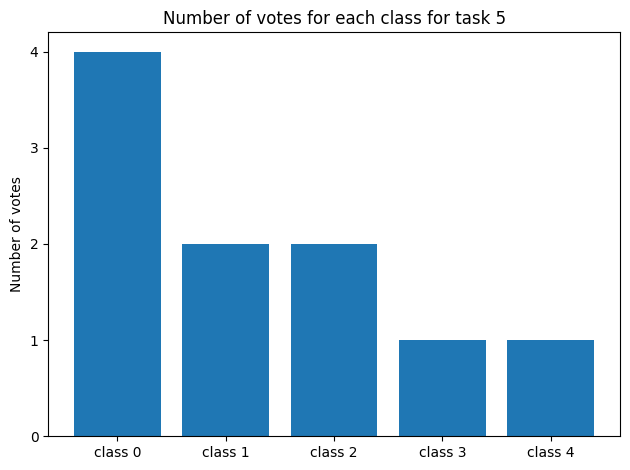

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

with open(path / "answers.json") as f:
    answers = json.load(f)
gt = np.load(path / "ground_truth.npy")

print("Task 5:", answers["5"])
print("Number of votes:", len(answers["5"]))
print("Ground truth:", gt[5])
fig, ax = plt.subplots()

counts = np.bincount(list(answers["5"].values()), minlength=5)
classes = [f"class {str(i)}" for i in [0, 1, 2, 3, 4]]

ax.bar(classes, counts)
plt.yticks(range(0, max(counts)+1))
ax.set_ylabel("Number of votes")
ax.set_title("Number of votes for each class for task 5")
plt.tight_layout()
plt.show()

Command Line Aggregation
------------------------

Let us run some aggregation methods on the dataset we just generated using the command line interface.

In [3]:
for strat in ["MV", "NaiveSoft", "DS", "GLAD", "DSWC[L=5]", "Wawa"]:
    ! peerannot aggregate ../_build/notebooks/ -s {strat}

Running aggregation mv with options {}
Aggregated labels stored at /home/circleci/project/doc/_build/notebooks/labels/labels_independent-confusion_mv.npy with shape (200,)


Running aggregation naivesoft with options {}
Aggregated labels stored at /home/circleci/project/doc/_build/notebooks/labels/labels_independent-confusion_naivesoft.npy with shape (200, 5)


Running aggregation ds with options {}


Dawid and Skene:   0%|                                   | 0/50 [00:00<?, ?it/s]

Dawid and Skene:  26%|██████▌                  | 13/50 [00:00<00:00, 123.60it/s]

Finished:  40%|████████████▊                   | 20/50 [00:00<00:00, 122.65it/s]
Aggregated labels stored at /home/circleci/project/doc/_build/notebooks/labels/labels_independent-confusion_ds.npy with shape (200, 5)


Running aggregation glad with options {}
- Running EM


  0%|                                                    | 0/50 [00:00<?, ?it/s]

  2%|▉                                           | 1/50 [00:00<00:46,  1.05it/s]

  4%|█▊                                          | 2/50 [00:01<00:46,  1.03it/s]

  6%|██▋                                         | 3/50 [00:02<00:46,  1.01it/s]

  8%|███▌                                        | 4/50 [00:03<00:45,  1.02it/s]

 10%|████▍                                       | 5/50 [00:04<00:44,  1.01it/s]

 12%|█████▎                                      | 6/50 [00:06<00:45,  1.02s/it]

 14%|██████▏                                     | 7/50 [00:06<00:42,  1.00it/s]

 16%|███████                                     | 8/50 [00:07<00:41,  1.02it/s]

 18%|███████▉                                    | 9/50 [00:08<00:39,  1.04it/s]

 20%|████████▌                                  | 10/50 [00:09<00:38,  1.04it/s]

 22%|█████████▍                                 | 11/50 [00:10<00:35,  1.09it/s]

 24%|██████████▎                                | 12/50 [00:11<00:34,  1.11it/s]

 26%|███████████▏                               | 13/50 [00:12<00:34,  1.08it/s]

 28%|████████████                               | 14/50 [00:13<00:32,  1.11it/s]

 30%|████████████▉                              | 15/50 [00:14<00:31,  1.10it/s]

 32%|█████████████▊                             | 16/50 [00:15<00:31,  1.08it/s]

 34%|██████████████▌                            | 17/50 [00:15<00:29,  1.13it/s]

 36%|███████████████▍                           | 18/50 [00:16<00:29,  1.10it/s]

 38%|████████████████▎                          | 19/50 [00:17<00:27,  1.11it/s]

 40%|█████████████████▏                         | 20/50 [00:18<00:27,  1.09it/s]

 42%|██████████████████                         | 21/50 [00:19<00:27,  1.07it/s]

 44%|██████████████████▉                        | 22/50 [00:20<00:25,  1.09it/s]

 46%|███████████████████▊                       | 23/50 [00:21<00:25,  1.05it/s]

 48%|████████████████████▋                      | 24/50 [00:22<00:24,  1.06it/s]

 50%|█████████████████████▌                     | 25/50 [00:23<00:23,  1.06it/s]

 52%|██████████████████████▎                    | 26/50 [00:24<00:21,  1.14it/s]

 54%|███████████████████████▏                   | 27/50 [00:24<00:19,  1.21it/s]

 56%|████████████████████████                   | 28/50 [00:25<00:18,  1.19it/s]

 58%|████████████████████████▉                  | 29/50 [00:26<00:16,  1.27it/s]

 60%|█████████████████████████▊                 | 30/50 [00:27<00:15,  1.33it/s]

 62%|██████████████████████████▋                | 31/50 [00:27<00:13,  1.40it/s]

 64%|███████████████████████████▌               | 32/50 [00:28<00:13,  1.35it/s]

 66%|████████████████████████████▍              | 33/50 [00:29<00:12,  1.39it/s]

 68%|█████████████████████████████▏             | 34/50 [00:30<00:11,  1.36it/s]

 70%|██████████████████████████████             | 35/50 [00:30<00:11,  1.33it/s]

 72%|██████████████████████████████▉            | 36/50 [00:31<00:09,  1.40it/s]

Finished:  74%|████████████████████████▍        | 37/50 [00:32<00:11,  1.15it/s]
Task difficulty coefficients saved at /home/circleci/project/doc/_build/notebooks/identification/glad/difficulties.npy
Worker ability coefficients saved at /home/circleci/project/doc/_build/notebooks/identification/glad/abilities.npy
Aggregated labels stored at /home/circleci/project/doc/_build/notebooks/labels/labels_independent-confusion_glad.npy with shape (200, 5)


Running aggregation dswc with options {'L': 5}


Aggregated labels stored at /home/circleci/project/doc/_build/notebooks/labels/labels_independent-confusion_dswc[l=5].npy with shape (200, 5)


Running aggregation wawa with options {}
/home/circleci/project/peerannot/models/aggregation/Wawa.py:59: UserWarning: 
            Wawa aggregation only returns hard labels.
            Defaulting to ``get_answers()``.
            
  warnings.warn(
Aggregated labels stored at /home/circleci/project/doc/_build/notebooks/labels/labels_independent-confusion_wawa.npy with shape (200,)


Now, as we know the ground truth we can evaluate the performance of the aggregation methods.
In this example we consider the accuracy. Other metrics such as F1-scores, precision, recall, etc. can be used.

In [4]:
import pandas as pd

def accuracy(labels, gt):
    return np.mean(labels == gt) if labels.ndim == 1 else np.mean(np.argmax(labels, axis=1) == gt)

results = {  # initialize results dictionary
    "mv": [],
    "naivesoft": [],
    "glad": [],
    "ds": [],
    "wawa": [],
    "dswc[l=5]": [],
}
for strategy in results.keys():
    path_labels = path / "labels" / f"labels_independent-confusion_{strategy}.npy"
    labels = np.load(path_labels)  # load aggregated labels
    results[strategy].append(accuracy(labels, gt))  # compute accuracy
results["NS"] = results["naivesoft"]  # rename naivesoft to NS
results.pop("naivesoft")

# Styling the results
results = pd.DataFrame(results, index=["AccTrain"])
results.columns = map(str.upper, results.columns)
results = results.style.set_table_styles(
    [dict(selector="th", props=[("text-align", "center")])]
)
results.set_properties(**{"text-align": "center"})
results = results.format(precision=3)
results

,MV,GLAD,DS,WAWA,DSWC[L=5],NS
AccTrain,0.750,0.780,0.890,0.790,0.775,0.760


API Aggregation
------------------------

We showed how to use the command line interface, but what about the API?
It's just as simple!

In [5]:
from peerannot.models import agg_strategies

strategies = ["MV", "GLAD", "DS", "NaiveSoft", "DSWC", "Wawa"]
yhats = []
for strat in strategies:
    agg = agg_strategies[strat]
    if strat != "DSWC":
        agg = agg(answers, n_classes=5, n_workers=30, n_tasks=200, dataset=path)
    else:
        agg = agg(answers, L=5, n_classes=5, n_workers=30, n_tasks=200)
    if hasattr(agg, "run"):
        agg.run(maxiter=20)
    yhats.append(agg.get_answers())

/home/circleci/miniconda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


- Running EM


  0% 0/20 [00:00<?, ?it/s]

  5% 1/20 [00:00<00:18,  1.04it/s]

 10% 2/20 [00:01<00:17,  1.00it/s]

 15% 3/20 [00:02<00:17,  1.00s/it]

 20% 4/20 [00:03<00:15,  1.02it/s]

 25% 5/20 [00:04<00:14,  1.04it/s]

 30% 6/20 [00:05<00:13,  1.03it/s]

 35% 7/20 [00:06<00:12,  1.04it/s]

 40% 8/20 [00:07<00:11,  1.03it/s]

 45% 9/20 [00:08<00:10,  1.00it/s]

 50% 10/20 [00:09<00:10,  1.02s/it]

 55% 11/20 [00:10<00:08,  1.03it/s]

 60% 12/20 [00:11<00:07,  1.06it/s]

 65% 13/20 [00:12<00:06,  1.04it/s]

 70% 14/20 [00:13<00:05,  1.08it/s]

 75% 15/20 [00:14<00:04,  1.08it/s]

 80% 16/20 [00:15<00:03,  1.07it/s]

 85% 17/20 [00:16<00:02,  1.09it/s]

 90% 18/20 [00:17<00:01,  1.09it/s]

 95% 19/20 [00:18<00:00,  1.09it/s]

100% 20/20 [00:19<00:00,  1.07it/s]

21it [00:20,  1.06it/s]            

Finished: : 21it [00:20,  1.06it/s]

Finished: : 21it [00:20,  1.05it/s]

Task difficulty coefficients saved at /home/circleci/project/doc/_build/notebooks/identification/glad/difficulties.npy
Worker ability coefficients saved at /home/circleci/project/doc/_build/notebooks/identification/glad/abilities.npy


Dawid and Skene:   0% 0/20 [00:00<?, ?it/s]

Dawid and Skene:  65% 13/20 [00:00<00:00, 126.55it/s]

Finished: 100% 20/20 [00:00<00:00, 126.55it/s]       

Finished: 100% 20/20 [00:00<00:00, 124.01it/s]

In [6]:
results = {  # initialize results dictionary
    "mv": [],
    "glad": [],
    "ds": [],
    "naivesoft": [],
    "dswc[l=5]": [],
    "wawa": [],
}
for i, strategy in enumerate(results.keys()):
    labels = yhats[i] # load aggregated labels
    results[strategy].append(accuracy(labels, gt))  # compute accuracy
results["NS"] = results["naivesoft"]  # rename naivesoft to NS
results.pop("naivesoft")

# Styling the results
results = pd.DataFrame(results, index=["AccTrain"])
results.columns = map(str.upper, results.columns)
results = results.style.set_table_styles(
    [dict(selector="th", props=[("text-align", "center")])]
)
results.set_properties(**{"text-align": "center"})
results = results.format(precision=3)
results

,MV,GLAD,DS,DSWC[L=5],WAWA,NS
AccTrain,0.775,0.775,0.890,0.775,0.790,0.760


The difference in performance shown result from the random tie-breaks generated.